## 1.1 Mutationswahrscheinlichkeit  
$100*0.01=1$ Veränderungen pro Mutation  
Also ziemlich wenige Veränderungen

## 1.2 Wirkung der Rekombination  
Nein, zum Beispiel kann man nicht aaaa herstellen, da es kein a an 4. Stelle gibt.

## 1.3 Fittnessbegriff
B hat die Meisten Nachkommen $\Rightarrow Fitness(A) = \frac{|A|}{|B|}$

## 1.4 Simulation einer Evolution

In [1]:
from Chromosome import Chromosome
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt

In [2]:
def evolve():
    parents = np.random.choice(population, 2, replace = False)
    child = parents[0].recombine(parents[1])
    child.mutate()
    fitnesses = list(map(lambda x: x.get_fitness(), population))
    least_fit_individuum = fitnesses.index(min(fitnesses))
    population[least_fit_individuum] = child

In [3]:
N = [10,50,100,500,1000]
GENERATIONS = 400
resulting_fitnesses = []
for i in range(len(N)):
    population = [Chromosome() for i in range(N[i])]
    population_fitness = []
    for j in range(GENERATIONS):
        evolve()
        population_fitness.append(sum(map(lambda x: x.get_fitness(), population)))
    population_fitness = [x/(N[i]*10) for x in population_fitness]
    resulting_fitnesses.append(population_fitness)

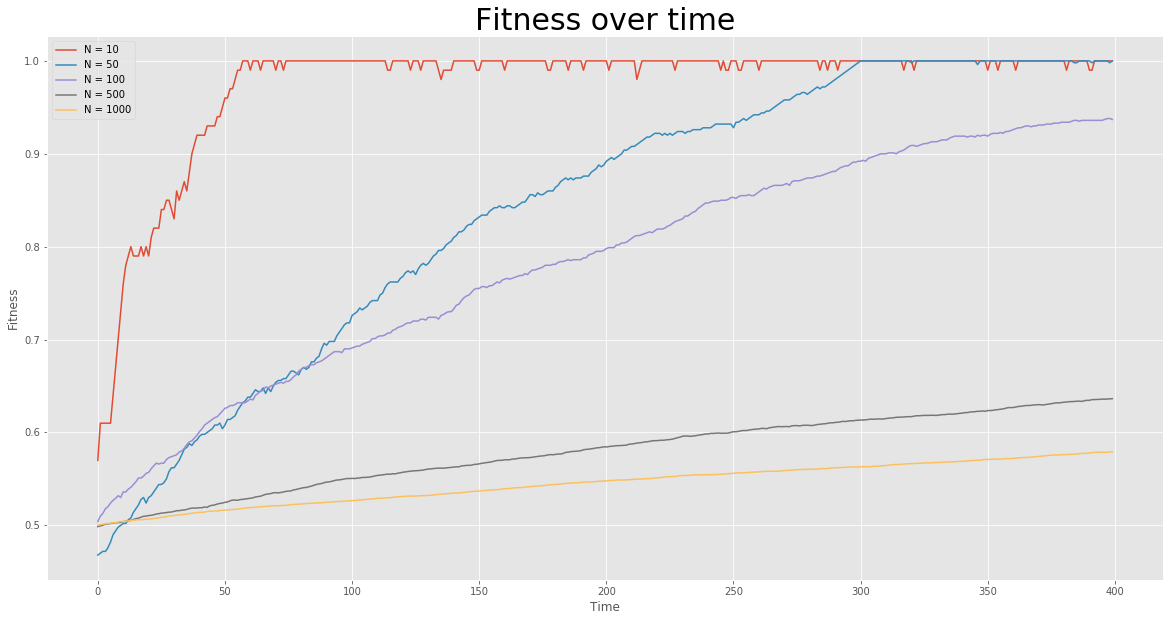

In [7]:
plt.subplots(1,1, figsize=(20,10))
plt.style.use('ggplot')
for i in range(len(N)):
    plt.plot(range(GENERATIONS), resulting_fitnesses[i])
    plt.title("Fitness over time", size = 30)
    plt.xlabel("Time")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.legend(["N = " + str(x) for x in N])

## 1.5 Koevolutionäres Verhalten

In [157]:
GENERATIONS = 100
PARASITE_STARTING_POP = 1000
HOST_STARTING_POP = 100
pred_hunting_rates = [0.09,0.1,0.12,0.15]
results = []
for i in range(len(pred_hunting_rates)):
    parasites = [PARASITE_STARTING_POP]
    hosts = [HOST_STARTING_POP]
    for j in range(GENERATIONS):
        parasites.append(int(parasites[-1] + hosts[-1]*pred_hunting_rates[i]))
        hosts.append(int(hosts[-1] - parasites[-1]*pred_hunting_rates[i]))
    results.append((parasites, hosts))

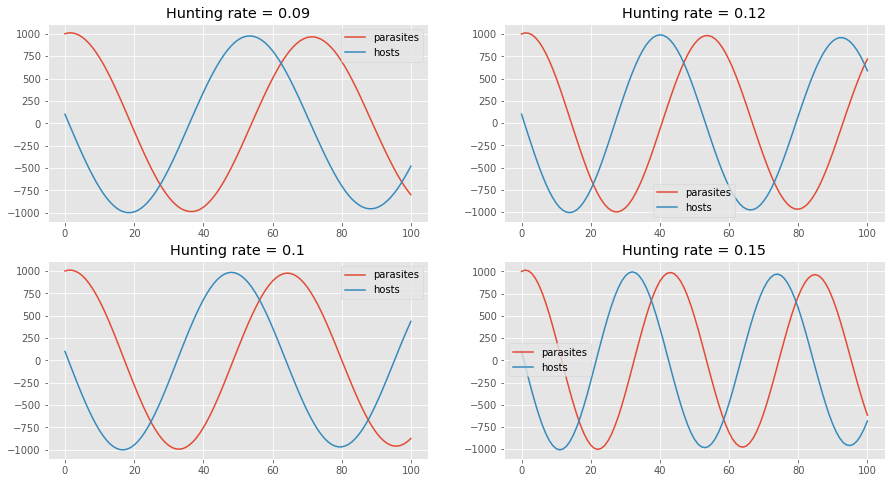

In [158]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in range(len(pred_hunting_rates)):
    axis = ax[i%2][int((i-(i%2))/2)]
    axis.plot(range(GENERATIONS+1), results[i][0])
    axis.plot(range(GENERATIONS+1), results[i][1])
    axis.legend(["parasites", "hosts"])
    axis.set_title("Hunting rate = {}".
                   format(pred_hunting_rates[i]))